<a href="https://colab.research.google.com/github/simonarahi/AI_HR/blob/master/candidate_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simona Rahi**
### ***Intern at AI Venture Labs*** 

# **Artificial Intelligence in Human Resources**



---










> # **Introduction**



  Artificial Intelligence (AI) refers to technology used to do a task that requires some level of intelligence to accomplish. The differentiators about AI are high-speed computation, huge amount of quality data, and advanced algorithms. AI has transformed the corporate world and introduced it to advanced solutions, and the Human Resouces (HR) department is no exception to this new era of intelligent transformation.

  Merging AI into HR administration functions benefits and improves the overall employee experience, as it would provide more time and budget and more accurate information for decision-making. AI is fueling HR's transition from administrative to strategic to mission critical. Smarter technologies are enabling HR teams to solve critical business challenges, drive exponential performance improvements, and even impact larger business outcomes and profitability.

This report is structured as follows: I start with reporting the market research conducted on the applications of AI in HR areas, then move on to the experiment that focuses on a specific area, and conclude some takeaway keypoints, then close off with a perspective on the subject.

---




> # **Market Research**

  AI solutions are being implemented into almost all the HR functions; in this project, we identify five key problem areas that have sub-areas and talk briefly about AI implementation in each. These are:

*1. Recruitment:*
AI-centered systems have streamlined iterative tasks in the recruitment process, from lead generation to candidate sourcing and screening to interviews. With smarter solutions, HR can find better fits and the process can take less time, as it would be easier to find a match using advanced algorithms. 

*2. Human Capital Management:*
As employee expectations increase, AI is helping HR teams reimagine people and talent processes to build stronger teams, reduce employee turnover, and enhance the employee experience. Some of the solutions offered optimize performance management and allows for feedback and recognition, as well as manage retention analytics to avoid talent loss. 

*3. Employee Engagement:*
This area is a challenge that HR faces, which makes it essential to leverage the power of AI to connect with employees, get their feedback, and use this feedback to create a meaningful employee engagement strategy. Using sentiment analysis, AI can provide insights into the general mood of employees, their satisfaction with the workflow, and their relationships with their coworkers. 

*4. Employee Benefits & Payroll:*
AI has transformed the employee benefits industry to a more simplified and personalized area, using chatbots is one example. For payroll, AI can automate paycheck anomaly detection as well as assessing and auditing payroll data.

*5. Learning & Development:* 
AI helps in personalizing the corporate training and learning by capturing significant employee data from their behaviors and experience. It recommends when the employee is due for training and what courses or learning paths would be most helpful for each employee.




---





> # **Experiment**



With the market research revealing the different areas and ways that AI is being implemented in HR functions, in my experiment, I focus on the first area of HR and specifically the candidate screening topic. Using supervised learning, I attempt to classify the performance of employees based on several features including position, department, payrate, sex, race, etc...
To achieve that, I use 5 different classification models and compare their performance metrics to choose the most accurate one.
The goal is to be able to build a model that can predict performance based on given data.

This section will cover the code used for the experiment 

## Loading Libraries

In [1]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification
import statsmodels.formula.api as smf

from time import time

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC 
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from pylab import rcParams
import seaborn as sb

from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading Data Set

The dataset I use is from Kaggle and is a synthetic dataset (***talk more about dataset***)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving HR_dataset.csv to HR_dataset.csv


In [3]:
HR = pd.read_csv(io.BytesIO(uploaded['HR_dataset.csv']))

In [4]:
HR.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


## Data Exploration

In [5]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               310 non-null    object 
 1   EmpID                       310 non-null    float64
 2   MarriedID                   310 non-null    float64
 3   MaritalStatusID             310 non-null    float64
 4   GenderID                    310 non-null    float64
 5   EmpStatusID                 310 non-null    float64
 6   DeptID                      310 non-null    float64
 7   PerfScoreID                 310 non-null    float64
 8   FromDiversityJobFairID      310 non-null    float64
 9   PayRate                     310 non-null    float64
 10  Termd                       310 non-null    float64
 11  PositionID                  310 non-null    float64
 12  Position                    310 non-null    object 
 13  State                       310 non

In [6]:
# looking at columns we have
HR.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

Text(0, 0.5, 'Avg Pay Rate')

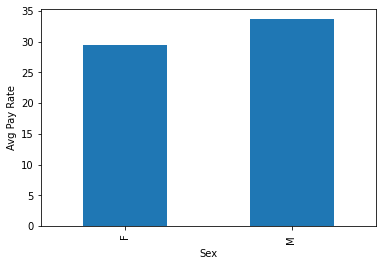

In [7]:
# looking at average payrates for each sex
plot1 = HR.groupby(['Sex']).mean().PayRate.plot(kind='bar')
plot1.set_ylabel("Avg Pay Rate")

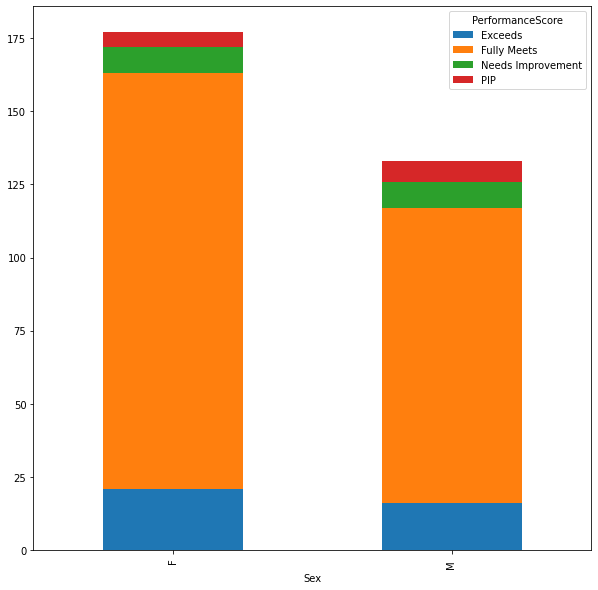

In [8]:
# looking at performance scores: M vs F
HR.groupby(['Sex', 'PerformanceScore']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10))


Text(0.5, 1.0, 'Missing values in the dataset')

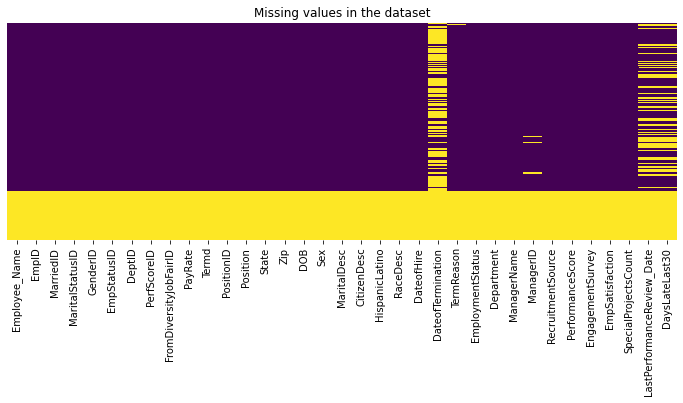

In [9]:
# plotting missing values
plt.figure(figsize=(12,4))
sns.heatmap(HR.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset')

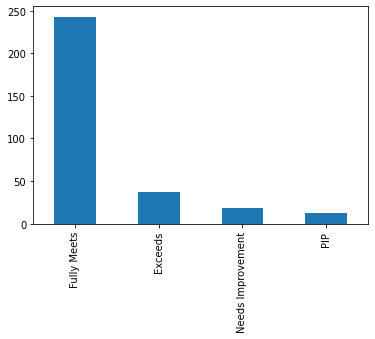

In [10]:
# counts of instances per class for Performance Score 
HR['PerformanceScore'].value_counts().plot(kind='bar')

In [11]:
# pairwise relationships with quantitative variables
HRquant = HR.filter(['PayRate','EngagementSurvey','EmpSatisfaction', 'SpecialProjectCounts'], axis=1)
HRquant.corr()

,PayRate,EngagementSurvey,EmpSatisfaction
PayRate,1.000000,-0.024223,0.061525
EngagementSurvey,-0.024223,1.000000,-0.017123
EmpSatisfaction,0.061525,-0.017123,1.000000


In [12]:
# calculating Shannon's entropy to ensure balance across classes
from scipy.stats import entropy
pd_series = pd.Series(HR['PerformanceScore'])
counts = pd_series.value_counts()
entropy = entropy(counts)
balance = entropy/np.log(4)

print(entropy)
print(balance)

0.7357224105786224
0.5307115366063262


## Models

In this second method, I will choose different features to predict the performance score of employees. This will be a multiclass classification problem.

In [13]:
HR = pd.read_csv(io.BytesIO(uploaded['HR_dataset.csv']))

### Preprocessing

In [14]:
HR.drop(columns=['GenderID', 'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID' ,
                 'DeptID', 'PositionID', 'DOB','State', 'Zip', 'CitizenDesc', 
                 'HispanicLatino', 'DateofHire', 'DateofTermination', 'TermReason', 
                 'ManagerName', 'ManagerID', 'LastPerformanceReview_Date', 'DaysLateLast30', 'PerformanceScore'], inplace=True)

In [15]:
HR.info()
HR.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PerfScoreID             310 non-null    float64
 1   FromDiversityJobFairID  310 non-null    float64
 2   PayRate                 310 non-null    float64
 3   Termd                   310 non-null    float64
 4   Position                310 non-null    object 
 5   Sex                     310 non-null    object 
 6   MaritalDesc             310 non-null    object 
 7   RaceDesc                310 non-null    object 
 8   EmploymentStatus        310 non-null    object 
 9   Department              310 non-null    object 
 10  RecruitmentSource       310 non-null    object 
 11  EngagementSurvey        310 non-null    float64
 12  EmpSatisfaction         310 non-null    float64
 13  SpecialProjectsCount    310 non-null    float64
dtypes: float64(7), object(7)
memory usage: 44.

In [16]:
# encoding our categorical nominal variables 
HR1 = pd.get_dummies(HR, columns=['Sex', 'Position', 'MaritalDesc', 'RaceDesc',
                                 'EmploymentStatus', 'Department', 'RecruitmentSource'])
HR1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 309
Data columns (total 86 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   PerfScoreID                                               310 non-null    float64
 1   FromDiversityJobFairID                                    310 non-null    float64
 2   PayRate                                                   310 non-null    float64
 3   Termd                                                     310 non-null    float64
 4   EngagementSurvey                                          310 non-null    float64
 5   EmpSatisfaction                                           310 non-null    float64
 6   SpecialProjectsCount                                      310 non-null    float64
 7   Sex_F                                                     310 non-null    uint8  
 8   Sex_M               

In [17]:
# selecting features columns (x) and response (y)
x = HR1.iloc[:,1:].values
Y = HR1.iloc[:, 0].values
print(x.shape)
print(Y.shape)

(310, 85)
(310,)


In [18]:
# splitting data into test (25%) and train (75%)
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.25, random_state=0)

Our response variable is PerfScoreID. It is an ordinal variable with 4 levels: 1 refers to PIP, 2 needs improvement, 3 fully meets, and 4 exceeds.

In [19]:
# handling imbalanced classes by oversampling minority class
smote = SMOTE('minority')

x_sm, Y_sm = smote.fit_sample(x_train, Y_train)
print(x_sm.shape, Y_sm.shape)

(404, 85) (404,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [20]:
# scaling features due to different in units
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
ss_x_train = ss_X.fit_transform(x_sm)
ss_x_test = ss_X.transform(x_test)

In [21]:
# getting column names to put in dataframe
col = HR1.columns[1:]
col

Index(['FromDiversityJobFairID', 'PayRate', 'Termd', 'EngagementSurvey',
       'EmpSatisfaction', 'SpecialProjectsCount', 'Sex_F', 'Sex_M ',
       'Position_Accountant I', 'Position_Administrative Assistant',
       'Position_Area Sales Manager', 'Position_BI Developer',
       'Position_BI Director', 'Position_CIO', 'Position_Data Analyst',
       'Position_Data Analyst ', 'Position_Data Architect',
       'Position_Database Administrator', 'Position_Director of Operations',
       'Position_Director of Sales', 'Position_Enterprise Architect',
       'Position_IT Director', 'Position_IT Manager - DB',
       'Position_IT Manager - Infra', 'Position_IT Manager - Support',
       'Position_IT Support', 'Position_Network Engineer',
       'Position_President & CEO', 'Position_Principal Data Architect',
       'Position_Production Manager', 'Position_Production Technician I',
       'Position_Production Technician II', 'Position_Sales Manager',
       'Position_Senior BI Developer', 'Po

In [22]:
# getting x train and x test into one dataframe: 'df_x'
df_x_train = pd.DataFrame(ss_x_train, columns=col)
df_x_test = pd.DataFrame(ss_x_test, columns=col)
df_x = pd.concat([df_x_test, df_x_train], axis=0)
df_x

,FromDiversityJobFairID,PayRate,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Sex_F,Sex_M,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Analyst,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_Enterprise Architect,Position_IT Director,Position_IT Manager - DB,Position_IT Manager - Infra,Position_IT Manager - Support,Position_IT Support,Position_Network Engineer,Position_President & CEO,Position_Principal Data Architect,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer,...,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,EmploymentStatus_Active,EmploymentStatus_Future Start,EmploymentStatus_Leave of Absence,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,Department_Admin Offices,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,RecruitmentSource_Billboard,RecruitmentSource_Careerbuilder,RecruitmentSource_Company Intranet - Partner,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Glassdoor,RecruitmentSource_Indeed,RecruitmentSource_Information Session,RecruitmentSource_Internet Search,RecruitmentSource_MBTA ads,RecruitmentSource_Monster.com,RecruitmentSource_Newspager/Magazine,RecruitmentSource_On-campus Recruiting,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Pay Per Click,RecruitmentSource_Pay Per Click - Google,RecruitmentSource_Professional Society,RecruitmentSource_Search Engine - Google Bing Yahoo,RecruitmentSource_Social Networks - Facebook Twitter etc,RecruitmentSource_Vendor Referral,RecruitmentSource_Website Banner Ads,RecruitmentSource_Word of Mouth
0,3.292640,0.441238,-0.926365,1.324841,0.759770,1.019531,1.023657,-1.023657,-0.086494,-0.070535,-0.300364,-0.070535,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,0.0,0.0,-0.070535,-0.049814,0.0,-0.086494,-0.26757,0.0,-0.049814,-0.174964,-0.976609,-0.643717,-0.070535,-0.086494,-0.070535,-0.132786,-0.049814,20.074860,-0.049814,-0.111943,...,-0.070535,2.768859,-0.429738,-0.1,-0.364303,-1.376712,1.032278,-0.159313,-0.174964,-0.360315,-0.776335,7.035624,0.0,-0.409728,-1.771079,-0.314651,-0.142134,-0.287098,-0.049814,-0.049814,3.292640,-0.239983,-0.142134,-0.122782,-0.070535,-0.111943,-0.371112,-0.209589,-0.182341,-0.159313,-0.049814,-0.122782,-0.049814,-0.378567,-0.456545,-0.410558,-0.159313,-0.305728,-0.254740,-0.142134
1,-0.350531,-0.613368,-0.926365,0.108875,-0.090260,-0.457317,1.023657,-1.023657,-0.086494,-0.070535,-0.300364,-0.070535,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,0.0,0.0,-0.070535,-0.049814,0.0,-0.086494,-0.26757,0.0,-0.049814,-0.174964,1.144952,-0.643717,-0.070535,-0.086494,-0.070535,-0.132786,-0.049814,-0.049814,-0.049814,-0.111943,...,-0.070535,-0.434165,2.570270,-0.1,-0.364303,-1.376712,1.032278,-0.159313,-0.174964,-0.360315,-0.776335,-0.142134,0.0,-0.409728,0.596640,-0.314651,-0.142134,-0.287098,-0.049814,-0.049814,-0.350531,-0.239983,-0.142134,-0.122782,-0.070535,-0.111943,-0.371112,-0.209589,-0.182341,6.276942,-0.049814,-0.122782,-0.049814,-0.378567,-0.456545,-0.410558,-0.159313,-0.305728,-0.254740,-0.142134
2,-0.350531,2.433271,-0.926365,1.324841,1.609800,2.496379,1.023657,-1.023657,-0.086494,-0.070535,-0.300364,-0.070535,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,0.0,0.0,-0.070535,-0.049814,0.0,-

In [23]:
# getting y train and y test into one dataframe: 'df_y'
df_y_train = pd.DataFrame(Y_sm, columns=['PerfScoreID'])
df_y_test =  pd.DataFrame(Y_test, columns=['PerfScoreID'])
df_y = pd.concat([df_y_train, df_y_test], axis=0)
df_y

,PerfScoreID
0,4.0
1,3.0
2,2.0
3,3.0
4,3.0
...,...
73,3.0
74,3.0
75,3.0
76,3.0


In [24]:
# combining both dataframes (x and y) into one
HR_df = df_x.join(df_y)
HR_df
#HR_df.to_csv('data_output/out.csv', index=False)

,FromDiversityJobFairID,PayRate,Termd,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Sex_F,Sex_M,Position_Accountant I,Position_Administrative Assistant,Position_Area Sales Manager,Position_BI Developer,Position_BI Director,Position_CIO,Position_Data Analyst,Position_Data Analyst,Position_Data Architect,Position_Database Administrator,Position_Director of Operations,Position_Director of Sales,Position_Enterprise Architect,Position_IT Director,Position_IT Manager - DB,Position_IT Manager - Infra,Position_IT Manager - Support,Position_IT Support,Position_Network Engineer,Position_President & CEO,Position_Principal Data Architect,Position_Production Manager,Position_Production Technician I,Position_Production Technician II,Position_Sales Manager,Position_Senior BI Developer,Position_Shared Services Manager,Position_Software Engineer,Position_Software Engineering Manager,Position_Sr. Accountant,Position_Sr. DBA,Position_Sr. Network Engineer,...,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,EmploymentStatus_Active,EmploymentStatus_Future Start,EmploymentStatus_Leave of Absence,EmploymentStatus_Terminated for Cause,EmploymentStatus_Voluntarily Terminated,Department_Admin Offices,Department_Executive Office,Department_IT/IS,Department_Production,Department_Sales,Department_Software Engineering,RecruitmentSource_Billboard,RecruitmentSource_Careerbuilder,RecruitmentSource_Company Intranet - Partner,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Glassdoor,RecruitmentSource_Indeed,RecruitmentSource_Information Session,RecruitmentSource_Internet Search,RecruitmentSource_MBTA ads,RecruitmentSource_Monster.com,RecruitmentSource_Newspager/Magazine,RecruitmentSource_On-campus Recruiting,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Pay Per Click,RecruitmentSource_Pay Per Click - Google,RecruitmentSource_Professional Society,RecruitmentSource_Search Engine - Google Bing Yahoo,RecruitmentSource_Social Networks - Facebook Twitter etc,RecruitmentSource_Vendor Referral,RecruitmentSource_Website Banner Ads,RecruitmentSource_Word of Mouth,PerfScoreID
0,3.292640,0.441238,-0.926365,1.324841,0.759770,1.019531,1.023657,-1.023657,-0.086494,-0.070535,-0.300364,-0.070535,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,0.0,0.0,-0.070535,-0.049814,0.0,-0.086494,-0.26757,0.0,-0.049814,-0.174964,-0.976609,-0.643717,-0.070535,-0.086494,-0.070535,-0.132786,-0.049814,20.074860,-0.049814,-0.111943,...,2.768859,-0.429738,-0.1,-0.364303,-1.376712,1.032278,-0.159313,-0.174964,-0.360315,-0.776335,7.035624,0.0,-0.409728,-1.771079,-0.314651,-0.142134,-0.287098,-0.049814,-0.049814,3.292640,-0.239983,-0.142134,-0.122782,-0.070535,-0.111943,-0.371112,-0.209589,-0.182341,-0.159313,-0.049814,-0.122782,-0.049814,-0.378567,-0.456545,-0.410558,-0.159313,-0.305728,-0.254740,-0.142134,4.0
0,3.292640,0.441238,-0.926365,1.324841,0.759770,1.019531,1.023657,-1.023657,-0.086494,-0.070535,-0.300364,-0.070535,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,0.0,0.0,-0.070535,-0.049814,0.0,-0.086494,-0.26757,0.0,-0.049814,-0.174964,-0.976609,-0.643717,-0.070535,-0.086494,-0.070535,-0.132786,-0.049814,20.074860,-0.049814,-0.111943,...,2.768859,-0.429738,-0.1,-0.364303,-1.376712,1.032278,-0.159313,-0.174964,-0.360315,-0.776335,7.035624,0.0,-0.409728,-1.771079,-0.314651,-0.142134,-0.287098,-0.049814,-0.049814,3.292640,-0.239983,-0.142134,-0.122782,-0.070535,-0.111943,-0.371112,-0.209589,-0.182341,-0.159313,-0.049814,-0.122782,-0.049814,-0.378567,-0.456545,-0.410558,-0.159313,-0.305728,-0.254740,-0.142134,3.0
0,3.292640,1.749101,1.264876,-1.857890,1.609800,1.019531,-1.138709,1.138709,-0.086494,-0.070535,-0.300364,-0.070535,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,-0.111943,-0.049814,-0.049814,0.0,0.0,-0.070535,-0.049814,0.0,-0.086494,-0.26757,0.0,-0.049814,-0.174964,-0.9

In [ ]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [ ]:
HR_df.to_csv('/drive/My Drive/HR_data.csv')

### Random Forest

In [25]:
rf = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)
#rf.fit(x_sm, Y_sm)
rf.fit(ss_x_train, Y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
# predictions
#rf_pred = rf.predict(x_test)
rf_pred = rf.predict(ss_x_test)

Accuracy score: 0.7948717948717948
Precision score: 0.7948717948717948
Recall score: 0.7948717948717948


Text(91.68, 0.5, 'Predicted Values')

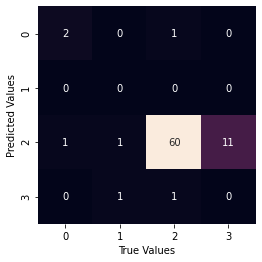

In [27]:
rf_accuracy = metrics.accuracy_score(Y_test, rf_pred) 
print("Accuracy score:",rf_accuracy)
precision = metrics.precision_score(Y_test, rf_pred, average='micro') 
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, rf_pred, average='micro') 
print("Recall score:",recall)

mat = confusion_matrix(Y_test,rf_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

### Naive Bayes

In [28]:
#gnb = GaussianNB().fit(x_sm, Y_sm)
gnb = GaussianNB().fit(ss_x_train, Y_sm)

In [29]:
#gnb_predictions = gnb.predict(x_test)
gnb_predictions = gnb.predict(ss_x_test)

Accuracy Score: 0.28205128205128205


Text(91.68, 0.5, 'Predicted Values')

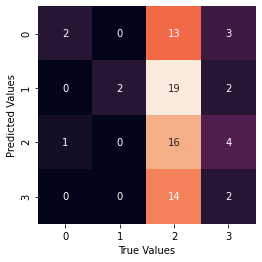

In [30]:
print('Accuracy Score:', accuracy_score(Y_test, gnb_predictions))
mat = confusion_matrix(Y_test,gnb_predictions)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

### SVM

In [31]:
#svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_sm, Y_sm) 
#svm_predictions = svm_model_linear.predict(x_test) 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(ss_x_train, Y_sm) 
svm_predictions = svm_model_linear.predict(ss_x_test) 

# model accuracy  
svm_accuracy = svm_model_linear.score(ss_x_test, Y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(Y_test, svm_predictions)

Accuracy Score: 0.7307692307692307


Text(91.68, 0.5, 'Predicted Values')

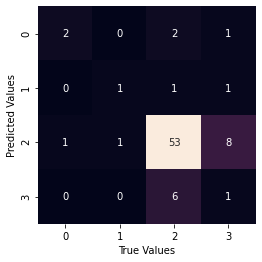

In [32]:
print('Accuracy Score:', svm_accuracy)
mat = confusion_matrix(Y_test,svm_predictions)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

### kNN

Text(0, 0.5, 'Testing Accuracy')

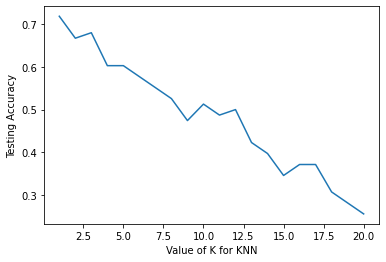

In [33]:
# to check which k gives the highest accuracy
k_range = range(1,21)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(ss_x_train, Y_sm)
  knn_pred=knn.predict(ss_x_test)
  scores[k] = metrics.accuracy_score(Y_test, knn_pred)
  scores_list.append(metrics.accuracy_score(Y_test, knn_pred))


plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [34]:
 knn = KNeighborsClassifier(n_neighbors = 1).fit(ss_x_train, Y_sm)

Accuracy Score: 0.717948717948718


Text(91.68, 0.5, 'Predicted Values')

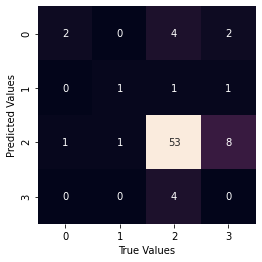

In [35]:
knn_accuracy = knn.score(ss_x_test, Y_test)
knn_predictions = knn.predict(ss_x_test)  
print('Accuracy Score:', knn_accuracy)
mat = confusion_matrix(Y_test,knn_predictions)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=0, solver="liblinear")
logistic_classifier.fit(ss_x_train, Y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
logistic_pred = logistic_classifier.predict(ss_x_test)

Accuracy: 0.7307692307692307
Precision score: 0.36887254901960786
Recall score: 0.4301075268817204


Text(91.68, 0.5, 'Predicted Values')

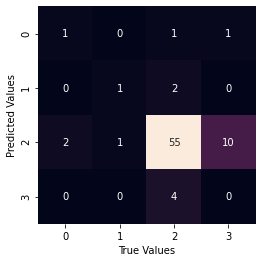

In [38]:
logistic_accuracy = metrics.accuracy_score(Y_test, logistic_pred) 
print("Accuracy:",logistic_accuracy)
precision = metrics.precision_score(Y_test, logistic_pred, average='macro') 
print("Precision score:",precision)
recall = metrics.recall_score(Y_test, logistic_pred, average='macro') 
print("Recall score:",recall)

mat = confusion_matrix(Y_test,logistic_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## Comparison of Performances Across Models

In [39]:
comparisons = {'Classifier':  ['Random Forest', 'Naive Bayes', 'Support Vector Machine', 'k-Nearest Neighbor', 'Logistic Regression'],
        'Accuracy': [rf_accuracy, accuracy_score(Y_test, gnb_predictions), svm_accuracy, knn_accuracy, logistic_accuracy]
        }

df = pd.DataFrame(comparisons, columns = ['Classifier','Accuracy'])
df

,Classifier,Accuracy
0,Random Forest,0.794872
1,Naive Bayes,0.282051
2,Support Vector Machine,0.730769
3,k-Nearest Neighbor,0.717949
4,Logistic Regression,0.730769


Text Cell here


---





> # **Conclusion**





As seen, AI is disrupting the HR department in almost all of its areas and allowing inefficiencies in the traditional system to be solved. The ideal strategy however is to employ AI in HR management by using AI software to analyze the data collected and leave the decision-making to the human staff. By the end of the day, we can’t take human from Human Resources, so it is advisable for executives to have the final word in decisions with the help of the tools provided by AI.
Some barriers for the workforce to adapt AI solutions could be worries about complexity as well as data security and privacy. Therefore, AI companies and startups must explain how they are using AI ethically as well as offer solutions to address security and privacy concerns.
AI is still developing, and the era of digital transformation is still maturing, so what is next for the HR?


---





> # **Perspective**



It is important to note that bias could be present in this model since it is also learning from demographic information such as sex and race, so further auditing is advised.